In [33]:
import numpy
import matplotlib.pyplot as plt
import random
from sklearn import linear_model 
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

import GenerateData
import PlotData

In [34]:
#openOrdersPerMinute = calcOpenOrdersPerMinute(orders)

#plotOrdersPerMinute(openOrdersPerMinute)

#plotOrderDelayPerOpenOrder(openOrdersPerMinute, orders)

In [35]:
def createTrainingData(ordersPerPerion):
    GenerateData.baseNumofOrders = ordersPerPerion

    weekOrders = []
    weekOpenOrdersPerMinute = []

    for i in range(7):
        dayOrders, dayOpenOrdersPerMinute = GenerateData.generateDataForOneDay(GenerateData.baseNumofOrders)
        weekOrders += dayOrders
        weekOpenOrdersPerMinute += dayOpenOrdersPerMinute

    return weekOrders, weekOpenOrdersPerMinute

In [36]:
def plotModelvsExpected(predictions, answers):
    plt.figure().set_figwidth(15)        
    plt.plot(predictions, color='blue', label="Predictions")
    plt.plot(answers, color='orange', label="Answers")
    plt.show() 
    plt.clf()

In [37]:
def createTestingData():
    testX = []
    testy= []

    testCount = 50
    testOpenOrdersPerMinute = []
    testOrders = GenerateData.createOrders(testCount, 3)
    GenerateData.calculatePrepTimeEstimates(testOrders)
    for i in range(testCount):
        randOrdersInProcess = random.randrange(0,GenerateData.KitchenOrderLimit*2)
        testOrdersInProcess = GenerateData.createOrders(randOrdersInProcess, 3)
        testOrdersInProcess.append(testOrders[i])
        testOrders[i]["orderTime"] = i+GenerateData.openTimeOffset
        testOpenOrdersPerMinute.append([i+GenerateData.openTimeOffset, testOrdersInProcess])

        testX.append(len(testOrdersInProcess))
        testy.append(GenerateData.calcDelayTime(testOrders[i], testOpenOrdersPerMinute))

    return testX, testy

In [38]:
def trainModel(weekOrders, weekOpenOrdersPerMinute):
    trainX = []
    trainy= []

    for order in weekOrders:
            delaytime = GenerateData.calcDelayTime(order, weekOpenOrdersPerMinute)
            trainX.append(len(weekOpenOrdersPerMinute[order["orderTime"]-GenerateData.openTimeOffset][1]))
            trainy.append(delaytime)
    mymodel = numpy.poly1d(numpy.polyfit(trainX, trainy, 3))
    myline = numpy.linspace(1, max(trainX), 100)
    plt.scatter(trainX, trainy)
    plt.ylabel("Order Delay Time")
    plt.xlabel("Open Orders")
    plt.plot(myline, mymodel(myline))

    return mymodel

In [39]:
def testModel(testCount, testX, testy, model):
    predictions = []
    answers = []
    deviations = []

    for i in range(testCount):
        #testEstimate = testOrders[i]["expectedMinutesToComplete"]

        #new_data_poly = poly.transform([[testOperOrders, testEstimate]])
        
        #predictedCompleteTime = regr.predict(new_data_poly)
        #predictedCompleteTime = regr.predict([[testOperOrders, testEstimate]])
        predictedCompleteTime = model(testX[i])
        predictions.append(predictedCompleteTime)
        answers.append(testy[i])
        deviations.append(round(predictedCompleteTime-testy[i], 4))
        
        #print("Test #: " + str(i) +
        #    " \ttestOrderCount: " + str(testX[i]) +
        #    #" \ttestOrderEst: " + str(testEstimate) +
        #    " \tpredictedCompleteTime: " + str(predictedCompleteTime) +
        #    " \tanswer: " + str(answer) +
        #    " \tDeviation: " + str(round(predictedCompleteTime-answer, 6)))
        
        #predictionsmodel = numpy.poly1d(numpy.polyfit(range(25), predictions, 10))
        #answersmodel = numpy.poly1d(numpy.polyfit(range(25), answers, 10))

        #predictionsline = numpy.linspace(1, 25, 25)
        #answersline = numpy.linspace(1, 25, 25)
    print("Average deviation from answer: " + str(sum(deviations)/len(deviations)))
    plotModelvsExpected(predictions, answers)


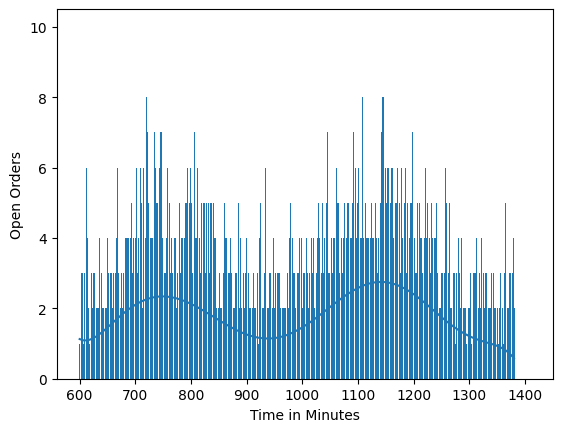

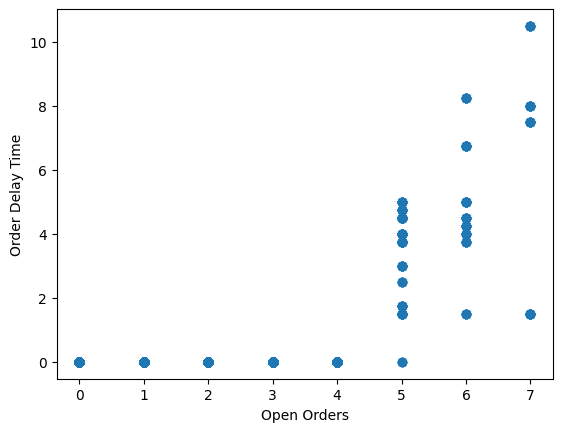

In [40]:
GenerateData.KitchenOrderLimit = 5
weekOrders, weekOpenOrdersPerMinute = createTrainingData(150)
PlotData.plotOrdersPerMinute(weekOpenOrdersPerMinute)

PlotData.plotOrderDelayPerOpenOrder(weekOpenOrdersPerMinute, weekOrders)
#df = pd.DataFrame(GenerateData.createDataFrame(weekOrders, weekOpenOrdersPerMinute))

#print(df.to_string())

In [41]:
def TrainandTest(limit, orderCount):
    GenerateData.KitchenOrderLimit = limit
    weekOrders, weekOpenOrdersPerMinute = createTrainingData(orderCount)
    model = trainModel(weekOrders, weekOpenOrdersPerMinute )
    testCount = 50
    testX, testy = createTestingData()
    testModel(testCount, testX, testy, model)


train on store w/ avg 500~ orders per day and limit of 5 orders in progress
Test #: 0 	testOrderCount: 10 	predictedCompleteTime: 26.479772200209776 	answer: 2.75 	Deviation: 23.729772
Test #: 1 	testOrderCount: 3 	predictedCompleteTime: 0.04459305888177151 	answer: 0 	Deviation: 0.044593
Test #: 2 	testOrderCount: 2 	predictedCompleteTime: -0.1379360067388085 	answer: 0 	Deviation: -0.137936
Test #: 3 	testOrderCount: 5 	predictedCompleteTime: 2.059828557847245 	answer: 1.75 	Deviation: 0.309829
Test #: 4 	testOrderCount: 7 	predictedCompleteTime: 7.668989154238995 	answer: 4.75 	Deviation: 2.918989
Test #: 5 	testOrderCount: 7 	predictedCompleteTime: 7.668989154238995 	answer: 3.75 	Deviation: 3.918989
Test #: 6 	testOrderCount: 10 	predictedCompleteTime: 26.479772200209776 	answer: 1.75 	Deviation: 24.729772
Test #: 7 	testOrderCount: 4 	predictedCompleteTime: 0.7074968167207629 	answer: 0 	Deviation: 0.707497
Test #: 8 	testOrderCount: 5 	predictedCompleteTime: 2.059828557847245 	a

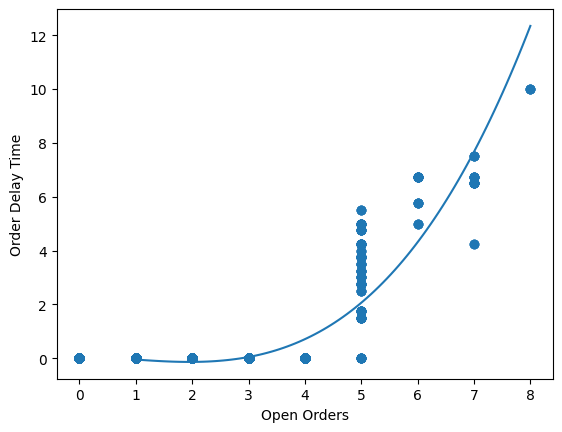

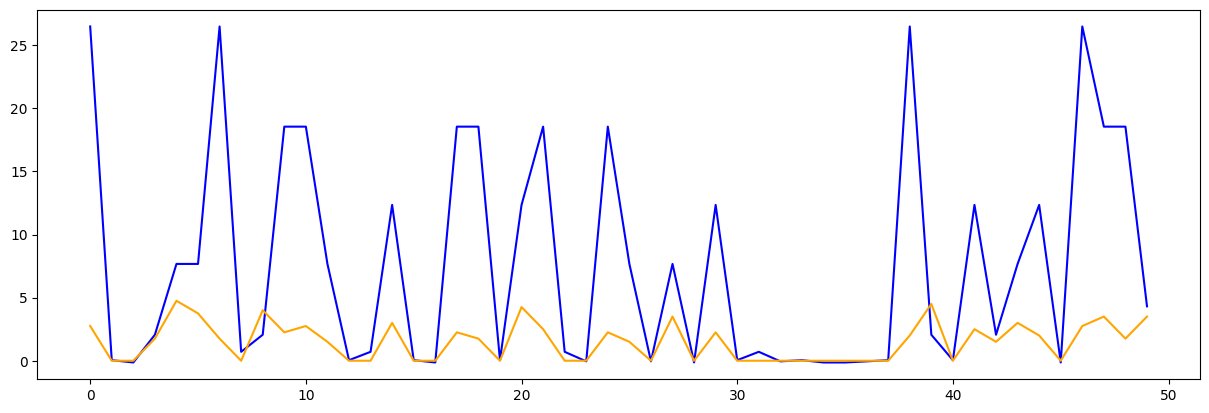

train on store w/ avg 350~ orders per day and limit of 3 orders in progress
Test #: 0 	testOrderCount: 2 	predictedCompleteTime: 0.5810860812445048 	answer: 0 	Deviation: 0.581086
Test #: 1 	testOrderCount: 2 	predictedCompleteTime: 0.5810860812445048 	answer: 0 	Deviation: 0.581086
Test #: 2 	testOrderCount: 2 	predictedCompleteTime: 0.5810860812445048 	answer: 0 	Deviation: 0.581086
Test #: 3 	testOrderCount: 3 	predictedCompleteTime: 2.497330839861113 	answer: 4.5 	Deviation: -2.002669
Test #: 4 	testOrderCount: 6 	predictedCompleteTime: 10.915092503794627 	answer: 3.25 	Deviation: 7.665093
Test #: 5 	testOrderCount: 5 	predictedCompleteTime: 8.001824354428928 	answer: 1.75 	Deviation: 6.251824
Test #: 6 	testOrderCount: 4 	predictedCompleteTime: 5.0834070320201725 	answer: 4.5 	Deviation: 0.583407
Test #: 7 	testOrderCount: 4 	predictedCompleteTime: 5.0834070320201725 	answer: 3.25 	Deviation: 1.833407
Test #: 8 	testOrderCount: 5 	predictedCompleteTime: 8.001824354428928 	answer: 

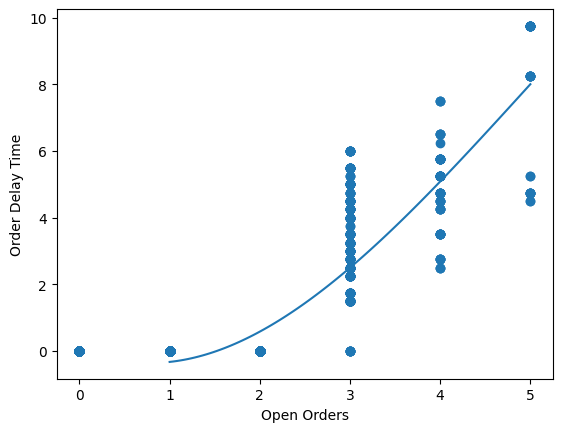

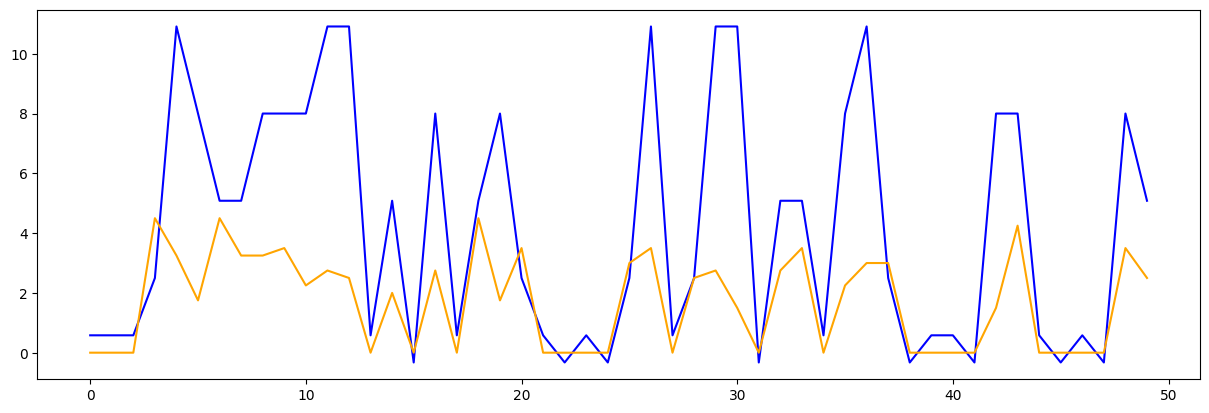

train on store w/ avg 260~ orders per day and limit of 2 orders in progress
Test #: 0 	testOrderCount: 3 	predictedCompleteTime: 6.621639587024808 	answer: 2.75 	Deviation: 3.87164
Test #: 1 	testOrderCount: 2 	predictedCompleteTime: 3.4649900983982436 	answer: 4.0 	Deviation: -0.53501
Test #: 2 	testOrderCount: 4 	predictedCompleteTime: 6.363112299287288 	answer: 3.5 	Deviation: 2.863112
Test #: 3 	testOrderCount: 1 	predictedCompleteTime: 0.15683757022561298 	answer: 0 	Deviation: 0.156838
Test #: 4 	testOrderCount: 2 	predictedCompleteTime: 3.4649900983982436 	answer: 1.75 	Deviation: 1.71499
Test #: 5 	testOrderCount: 4 	predictedCompleteTime: 6.363112299287288 	answer: 2.75 	Deviation: 3.613112
Test #: 6 	testOrderCount: 3 	predictedCompleteTime: 6.621639587024808 	answer: 2.5 	Deviation: 4.12164
Test #: 7 	testOrderCount: 4 	predictedCompleteTime: 6.363112299287288 	answer: 3.0 	Deviation: 3.363112
Test #: 8 	testOrderCount: 1 	predictedCompleteTime: 0.15683757022561298 	answer: 

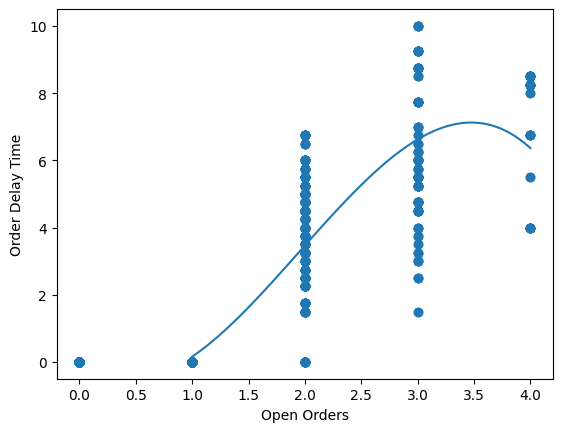

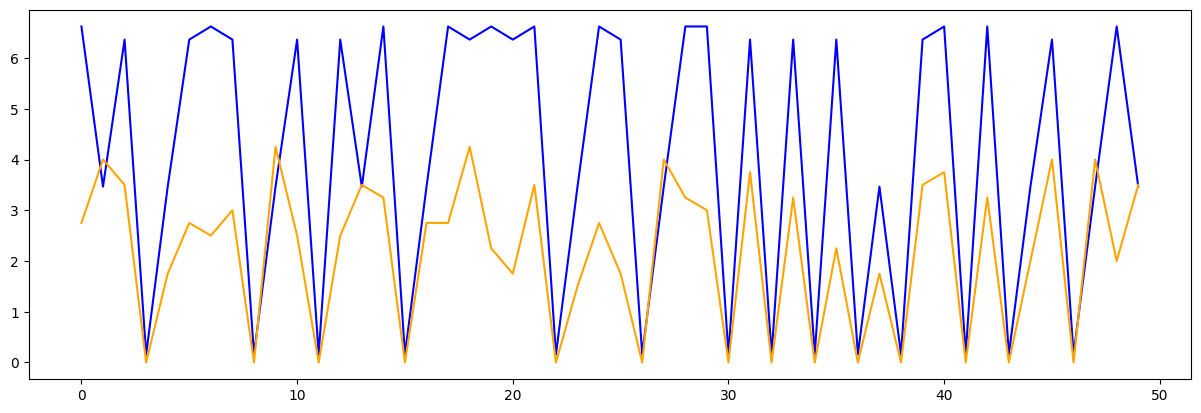

train on store w/ avg 7~ orders per day and limit of 8 orders in progress
Test #: 0 	testOrderCount: 8 	predictedCompleteTime: 4.389567180420895 	answer: 3.5 	Deviation: 0.889567
Test #: 1 	testOrderCount: 4 	predictedCompleteTime: -0.18260042945284183 	answer: 0 	Deviation: -0.1826
Test #: 2 	testOrderCount: 3 	predictedCompleteTime: -0.09517367317976932 	answer: 0 	Deviation: -0.095174
Test #: 3 	testOrderCount: 6 	predictedCompleteTime: 0.710728705080343 	answer: 0 	Deviation: 0.710729
Test #: 4 	testOrderCount: 4 	predictedCompleteTime: -0.18260042945284183 	answer: 0 	Deviation: -0.1826
Test #: 5 	testOrderCount: 14 	predictedCompleteTime: 48.47432838770591 	answer: 3.25 	Deviation: 45.224328
Test #: 6 	testOrderCount: 10 	predictedCompleteTime: 12.487433970210725 	answer: 4.25 	Deviation: 8.237434
Test #: 7 	testOrderCount: 3 	predictedCompleteTime: -0.09517367317976932 	answer: 0 	Deviation: -0.095174
Test #: 8 	testOrderCount: 12 	predictedCompleteTime: 26.63784804809176 	answe

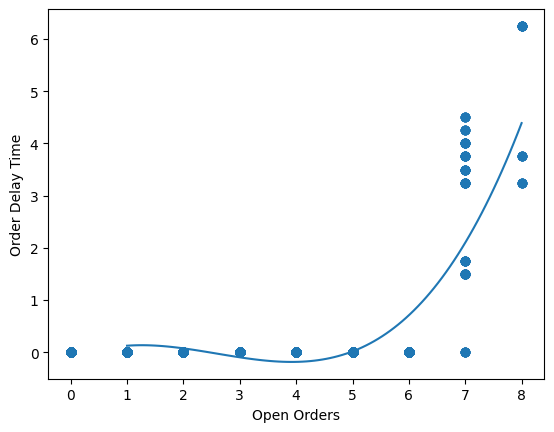

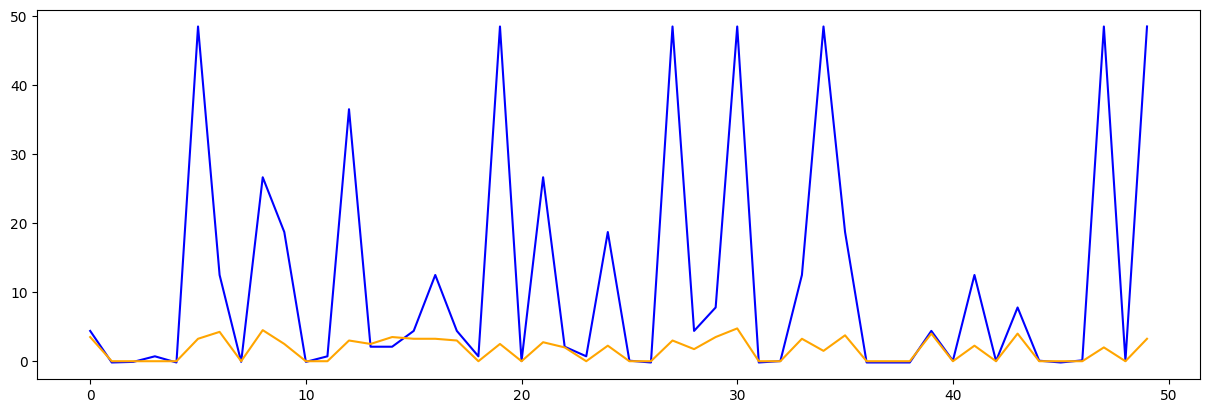

<Figure size 640x480 with 0 Axes>

In [42]:
## Sci Kit Learn Multi regression model
#X = df[['OpenOrdersWhenPlaced', 'expectedMinutesToComplete']]
#X = df.iloc[:, :-1].values
#y = df["ActualMinutesToComplete"] 
#y = df.iloc[:, -1].values

#poly = PolynomialFeatures(degree=2)
#X_poly = poly.fit_transform(X)

#print(df.iloc[:, -1].values)

#regr = linear_model.LinearRegression()
#regr.fit(X_poly, y) 
#regr.fit(X, y) 


print("train on store w/ avg 500~ orders per day and limit of 5 orders in progress")
TrainandTest(5, 150)

print("train on store w/ avg 350~ orders per day and limit of 3 orders in progress")
TrainandTest(3, 100)

print("train on store w/ avg 260~ orders per day and limit of 2 orders in progress")
TrainandTest(2, 75)

print("train on store w/ avg 7~ orders per day and limit of 8 orders in progress")
TrainandTest(7, 200)
